<a href="https://colab.research.google.com/github/vcapobia/BSAN6070/blob/main/India_Air_Quality_CA01_Victoria_Capobianco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your name: Victoria Capobianco
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [69]:
# import packages 
import pandas as pd
import numpy as np


# Data File Reading Section
## Write code to read in data from external sources here

In [70]:
#read dataset into dataframe
data=pd.read_csv('BSAN6060-CA01-Data.csv')





/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [71]:
#Summarise Details of Data

#1. statistical description
data.describe()
#2. total # of rows/cols
data.shape
#3. # of non-null per column
data.count()
#4. sum of null values per column
data.isnull().sum()
#5. range, column, number of non-null obj, dtypes, memusage
data.info()
#6. top 10 records
data.head(10)
#bottom 10 records
data.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/2015
435733,SAMP,12/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/2015
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/2015
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/2015
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/2015
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [72]:
# Cleaning up the data

#1. dropping columns that aren't required
data.drop(['stn_code', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True)

#2. dropping rows where no date is available
data.drop(data[data['date'] == 'NaN'].index, inplace=True)
data.head(10)

,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990
5,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,3/1/1990
6,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,4/1/1990
7,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,4/1/1990
8,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,4/1/1990
9,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,5/1/1990


### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [73]:
#replace types
data.type= data.type.replace({"Residential":"R", 
                              "Residential and others": "RO", 
                              "Residential, Rural and other Areas":"RRO", 
                              "Industrial Area":"I", 
                              "Industrial Areas":"I", 
                              "Industrial":"I", 
                              "Sensitive Area":"S",
                              "Sensitive Areas":"S",
                              np.nan:"RRO"})


In [74]:
# Display top 10 records after codification of 'types'
data.head(10)

,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,3/1/1990
5,Andhra Pradesh,Hyderabad,NaN,RRO,6.4,25.7,NaN,NaN,NaN,3/1/1990
6,Andhra Pradesh,Hyderabad,NaN,RRO,5.4,17.1,NaN,NaN,NaN,4/1/1990
7,Andhra Pradesh,Hyderabad,NaN,I,4.7,8.7,NaN,NaN,NaN,4/1/1990
8,Andhra Pradesh,Hyderabad,NaN,RRO,4.2,23.0,NaN,NaN,NaN,4/1/1990
9,Andhra Pradesh,Hyderabad,NaN,I,4.0,8.9,NaN,NaN,NaN,5/1/1990


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [75]:
#convert date column to datetime
data['date']=pd.to_datetime(data['date'])
#check conversion
data.info()
#extract year into new column
import datetime
data['year']=pd.DatetimeIndex(data['date']).year
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435742 entries, 0 to 435741
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435742 non-null  object        
 1   location  435739 non-null  object        
 2   agency    286261 non-null  object        
 3   type      435742 non-null  object        
 4   so2       401096 non-null  float64       
 5   no2       419509 non-null  float64       
 6   rspm      395520 non-null  float64       
 7   spm       198355 non-null  float64       
 8   pm2_5     9314 non-null    float64       
 9   date      435735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 36.6+ MB


,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990.0
1,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990.0
2,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990.0
3,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990.0
4,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990.0


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [76]:
# define columns of importance, which shall be used reguarly (COLS = ....) variable
COLS =['so2', 'no2', 'rspm', 'spm', 'pm2_5']
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
from sklearn.impute import SimpleImputer
imputer_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
#data.so2= imputer_mean.fit_transform(data['so2'].values.reshape(-1,1))[:,0]
data[COLS]=imputer_mean.fit_transform(data[COLS])
data.info()
# Display data.info after the transformation
# Display that there are no more missing values in the dataset



<class 'pandas.core.frame.DataFrame'>
Int64Index: 435742 entries, 0 to 435741
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435742 non-null  object        
 1   location  435739 non-null  object        
 2   agency    286261 non-null  object        
 3   type      435742 non-null  object        
 4   so2       435742 non-null  float64       
 5   no2       435742 non-null  float64       
 6   rspm      435742 non-null  float64       
 7   spm       435742 non-null  float64       
 8   pm2_5     435742 non-null  float64       
 9   date      435735 non-null  datetime64[ns]
 10  year      435735 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 39.9+ MB


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [77]:
#a) so2 table
so2_median=data[['state', 'so2']].groupby('state', as_index=False).median('so2').sort_values(by='so2')
so2_median.head()

,state,so2
23,Nagaland,2.0
21,Meghalaya,2.0
22,Mizoram,2.0
1,Arunachal Pradesh,2.5
12,Himachal Pradesh,3.0


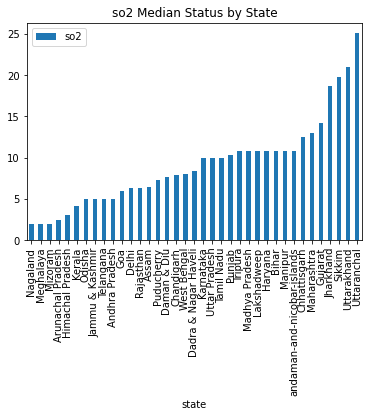

In [78]:
#b) so2 visual
import matplotlib.pyplot as plt
so2_median.plot.bar(x='state', y='so2' )
plt.title('so2 Median Status by State')
plt.show()


### no2 status

In [79]:
#a) no2 table
no2_median=data[['state', 'no2']].groupby('state', as_index=False).median('no2').sort_values(by='no2')
no2_median.head()

,state,no2
1,Arunachal Pradesh,5.0
22,Mizoram,5.0
23,Nagaland,7.0
21,Meghalaya,10.0
9,Goa,11.6


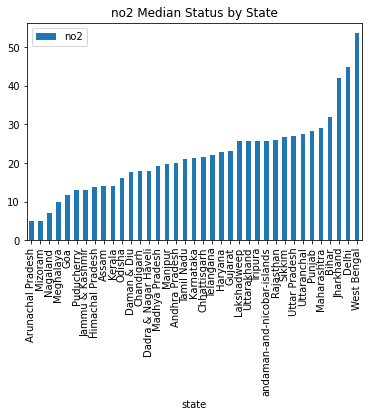

In [80]:
#b) no2 visual
import matplotlib.pyplot as plt
no2_median.plot.bar(x='state', y='no2' )
plt.title('no2 Median Status by State')
plt.show()

### rspm status

In [81]:
#a) rspm table
rspm_median=data[['state', 'rspm']].groupby('state', as_index=False).median('rspm').sort_values(by='rspm')
rspm_median.head()

,state,rspm
28,Sikkim,32.0
22,Mizoram,40.0
25,Puducherry,46.0
16,Kerala,49.0
9,Goa,56.0


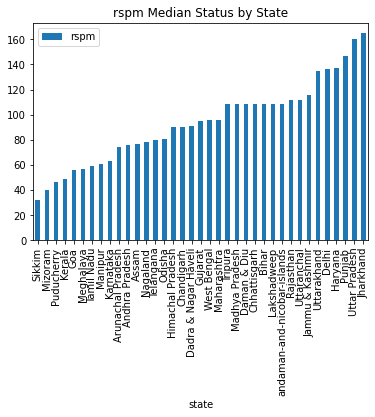

In [82]:
#b) rspm visual
import matplotlib.pyplot as plt
rspm_median.plot.bar(x='state', y='rspm' )
plt.title('rspm Median Status by State')
plt.show()

### spm status

In [83]:
#a) spm table
spm_median=data[['state', 'spm']].groupby('state', as_index=False).median('spm').sort_values(by='spm')
spm_median.head()

,state,spm
28,Sikkim,75.0
20,Manipur,120.5
25,Puducherry,191.0
9,Goa,199.0
7,Daman & Diu,200.5


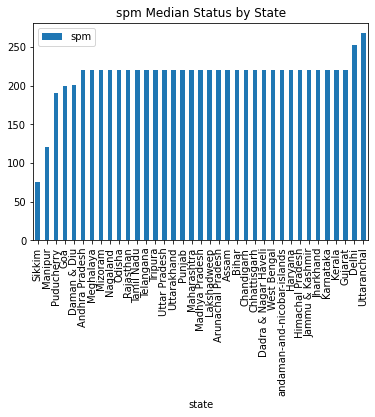

In [84]:
#b) spm visual
import matplotlib.pyplot as plt
spm_median.plot.bar(x='state', y='spm' )
plt.title('spm Median Status by State')
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [85]:
#slice data into new dataframe ap_df
ap_df=data.loc[data.state=='Andhra Pradesh']
ap1=ap_df[['state', 'so2', 'no2', 'rspm', 'spm','year']].groupby('year', as_index=False)
ap1.head()

,state,so2,no2,rspm,spm,year
0,Andhra Pradesh,4.8,17.4,108.832784,220.78348,1990.0
1,Andhra Pradesh,3.1,7.0,108.832784,220.78348,1990.0
2,Andhra Pradesh,6.2,28.5,108.832784,220.78348,1990.0
3,Andhra Pradesh,6.3,14.7,108.832784,220.78348,1990.0
4,Andhra Pradesh,4.7,7.5,108.832784,220.78348,1990.0
...,...,...,...,...,...,...
23753,Andhra Pradesh,9.0,18.0,46.000000,220.78348,2015.0
23754,Andhra Pradesh,8.0,18.0,27.000000,220.78348,2015.0
23755,Andhra Pradesh,9.0,15.0,29.000000,220.78348,2015.0
23756,Andhra Pradesh,7.0,17.0,78.000000,220.78348,2015.0


In [86]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
#A)so2 and no2
plt.plot(ap1.groupby('year').so2.agg('median'), color='green', marker='o')
plt.plot(ap1.groupby('year').no2.agg('median'), color='blue', marker='o')
plt.title('so2 vs. no2 Median Status Over Time')
plt.legend
plt.show()

AttributeError: ignored

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ConversionError: ignored

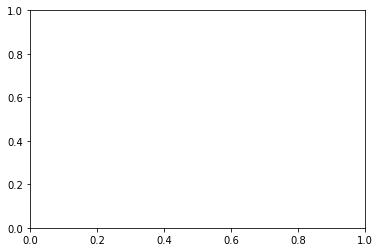

In [87]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
#A)so2 and no2
plt.plot(ap1['rspm'], color='green', marker='o')
plt.plot(ap1['spm'], color='blue', marker='o')
plt.title('rspm vs. spm Median Status Over Time')
plt.legend
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



Based on the ap1 dataframe, rspm has decreased from a consistent 108 in 1990, to less than 80 in 2015. Spm has remained consistent around 220. No2 continues to fluctuate between 15-28. Finally, so2 has a slight increased range of values between 7-9 by 2015. 
